In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [0]:
def cal_dis(scanline,i,j,grey_right,grey_left):
  return (math.pow(grey_left[scanline][i]-grey_right[scanline][j],2)/4)

def recursive_step(scanline,D,row,column,grey_left,grey_right):
  if(row<0 or column<0 ):
    return 1000000000000
  if(column == 0 and row == 0):
    
    return D[0][0]
  
  elif(D[row][column] != 0):
    
    return D[row][column]
  
  else:
    disparity = cal_dis(scanline,row,column,grey_right,grey_left)
    #print(row,column)
    D[row][column] = min( recursive_step(scanline,D,row-1,column-1,grey_left,grey_right) + disparity ,recursive_step(scanline,D,row-1,column,grey_left,grey_right) + 1,recursive_step(scanline,D,row,column-1,grey_left,grey_right) + 1)
    if (row == 399 and column == 399):
      return D
    else:
      return D[row][column]

In [0]:
def best_path(N,M,D):
  p=N-1
  q=N-1
  new_match = np.zeros((N))
  k=N-1
  while p!=0 and q!=0:
    if(M[p][q]==1):
      new_match[p] = D[p][q]
      p-=1
      q-=1
    if(M[p][q]==2):
      p-=1
    if(M[p][q]==3):
      q-=1
  return new_match


def matching(N,D,grey_left,grey_right,row):
  M = np.zeros((400,400))
  for i in range(1,N):
    for j in range(1,N):
      min1 = D[i-1][j-1]+math.pow((grey_left[row][i]-grey_right[row][j]),2)/4
      min2 = D[i-1][j]+1
      min3 = D[i][j-1]+1
      cmin =min(min1,min2,min3)
      D[i][j] = cmin
      if(cmin == min1):
        M[i][j] = 1
      if(cmin == min2):
        M[i][j] = 2
      if(cmin == min3):
        M[i][j] = 3
  path = best_path(N,M,D)
   
  return path,D

In [0]:
def disparity_dp(img_left,img_right):
  #color 2 grey
  flag=0
  grey_right = cv2.cvtColor(cv2.imread(img_right), cv2.COLOR_BGR2GRAY)
  grey_left = cv2.cvtColor(cv2.imread(img_left), cv2.COLOR_BGR2GRAY)
  cv2_imshow(grey_right)
  cv2_imshow(grey_left)
  disparity_image = np.zeros((354,400)) 
  for i in range(0,354):
    D = np.zeros((400,400))
    D[0][0] = math.pow((grey_left[0][0]-grey_right[0][0]),2)/4
    for k in range(1,400):
      D[k][0] = k*1
      D[0][k] = k*1
    #D = recursive_step(i,D,399,399,grey_right,grey_left)
    new_match ,D= matching(400,D,grey_left,grey_right,i)
    #cv2_imshow(D)
    #d_new = backtracking(D,399)
    disparity_image[i:,] = new_match
    #print(flag)
    #flag+=1
  cv2_imshow(disparity_image)
    #break

  return

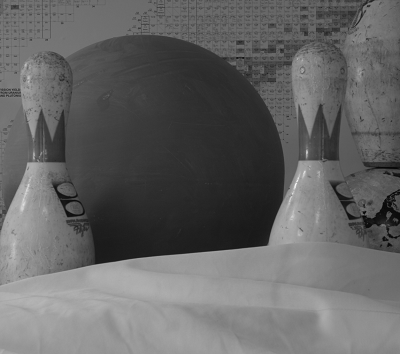

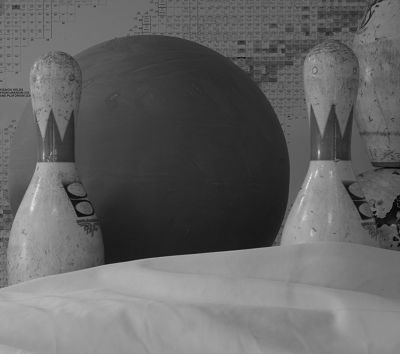

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


KeyboardInterrupt: ignored

In [18]:
disparity_dp('/content/sample_left.png','/content/sample_right.png')

In [0]:
s = int(0)
t = int(0)
sum_square = int(0)
sum_absolute = int(0)
kernel_size = 9
left_block = np.zeros((kernel_size, kernel_size),np.uint8)
right_block = np.zeros((kernel_size, kernel_size),np.uint8)
half_kernel = int(kernel_size/2)
left_img = cv2.imread('sample_left.png')
right_img = cv2.imread('sample_right.png')
cv2_imshow(left_img)
cv2_imshow(right_img)
##########################################################
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(left_gray)
cv2_imshow(right_gray)
print(left_gray.shape) 
print(right_gray.shape)
##########################################################
height,width = left_gray.shape
disparity_square = np.zeros((height, width))
disparity_absolute = np.zeros((height, width))
#print(left_block.shape)
#print(left_block[0][1])
#print(left_gray[0][0])
#print(left_gray[200][100])
#print(half_kernel)
for i in range(0, height):
    print(i) 
    for j in range(0, width):
        s=0
        for u in range(i-half_kernel, i+half_kernel+1):
            for v in range(j-half_kernel, j+half_kernel+1):
                #print(u)
                #print(v)
                if u<0 or v<0 or v> width-1 or u>height-1:
                    #print(s)
                    #print(t)
                    left_block[s][t] = 0
                else:
                    left_block[s][t] = left_gray[u][v]
                t=t+1
            s=s+1  
            t=0
        for k in range(0, width):
            #print(k)
            s=0
            t=0 
            for u in range(i-half_kernel, i+half_kernel+1):
                for v in range(k-half_kernel, k+half_kernel+1):
                    #print('yes')
                    #print(v) 
                    if u<0 or v<0 or v>width-1 or u>height-1:
                        #print(s)
                        #print(t)
                        right_block[s][t] = 0
                    else:
                        right_block[s][t] = right_gray[u][v]
                    t = t+1
                s = s+1
                t = 0
            sum_square = 0
            sum_absolute = 0    
            for m in range(0, kernel_size):
                for n in range(0, kernel_size):
                    element_square = math.pow(left_block[m][n] - right_block[m][n],2)
                    element_absolute = abs(left_block[m][n] - right_block[m][n])
                    sum_square = sum_square + element_square
                    sum_absolute = sum_absolute + element_absolute
            sum_square = sum_square/kernel_size
            sum_absolute = sum_absolute/kernel_size
            
            if k==0:
                minimum_square = sum_square
                minimum_absolute = sum_absolute

            if sum_square < minimum_square:
                minimum_square = sum_square
            #else: 
                #minimum_square = minimum_square_1   

            if sum_absolute < minimum_absolute:
                minimum_absolute = sum_absolute
            #else: 
                #minimum_absolute = minimum_absolute_1 

        disparity_square[i][j] =  minimum_square
        disparity_absolute[i][j] =  minimum_absolute


cv2_imshow(disparity_square)
cv2_imshow(disparity_absolute)

